In [26]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import os
import matplotlib.pyplot as plt


In [27]:
gpu_train = torch.cuda.is_available()
print(f"GPU is activated: {gpu_train}")

GPU is activated: True


In [33]:
num_workers = 0
batch_size = 100
val_size = 0.20
path = 'food-101/images'

transform = transforms.Compose([
    transforms.Resize(100),
    transforms.RandomCrop(90),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

dataset = datasets.ImageFolder(root = path, transform = transform)

train_size = int(len(dataset) * 0.7)
test_size = int(len(dataset) * 0.15)
valid_size = len(dataset) - train_size - test_size
train_dataset, test_dataset, valid_dataset = torch.utils.data.random_split(dataset, [train_size, test_size, valid_size])

classes = []
for root, dirs, files in os.walk(f"./{path}"):
   classes.append(dirs)
classes = classes[0]

print(f"Train Size: {train_size} ({100 * train_size/len(dataset)}%)")
print(f"Test Size: {test_size} ({100 * test_size/len(dataset)}%)")
print(f"Validation Size: {valid_size} ({100 * valid_size/len(dataset)}%)")
print(f"Number of Classes: {len(classes)}")
print(f"Total Size: {len(dataset)}")

Train Size: 70700 (70.0%)
Test Size: 15150 (15.0%)
Validation Size: 15150 (15.0%)
Number of Classes: 101
Total Size: 101000


Create Trainloaders

In [34]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, num_workers=num_workers)

Show Sample Images

tensor([  7,  23,  54,   3,  38,  34,  65,  68,  48,  60,  26,  99,  16,  86,
         12,  25,  61,  34,  57,  51,  47,  67,  30,  89,   2,  34,   5,  23,
         24,  80,   8,   1,  56,  23,  44,   2,  23,  15,  41,  91,  22,  84,
         19,  88,  26,  16,  49,  13,  93,  54,  22,  12,  42,   8,  88,  70,
         21,  78,  16,  63,  76,  23,  72,  75,  61,  63,  83,   6,  90,  55,
         76,  45,  64,  10,  35,  54,  35,  56,  68,  81,  55,  20,  33,  37,
         34,  99,  13,  46,  31,  30,  92,  38,  45,  67,  87,  86,  36,  36,
        100,  23])


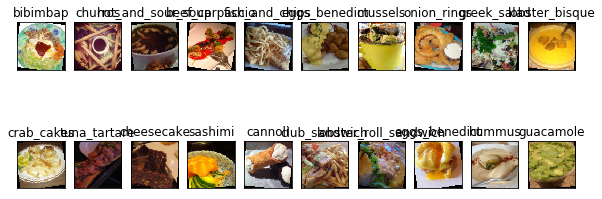

In [35]:
def imshow(img):
    img = img / 2 + 0.5 
    plt.imshow(np.transpose(img, (1, 2, 0)))

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

print(labels)
fig = plt.figure(figsize=(10, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])
    